In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('telco_cleaned.csv')
# üí° Visa dataset-information
print("Form:", df.shape)
print("\nDatatyper:")
print(df.dtypes)
print("\nBeskrivning av numeriska kolumner:")
print(df.describe())

# üìä F√∂rdelning av Churn (target)
print("\nF√∂rdelning av Churn:")
print(df['Churn'].value_counts(normalize=True))


Form: (7032, 31)

Datatyper:
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                    

Korrelationsmatris

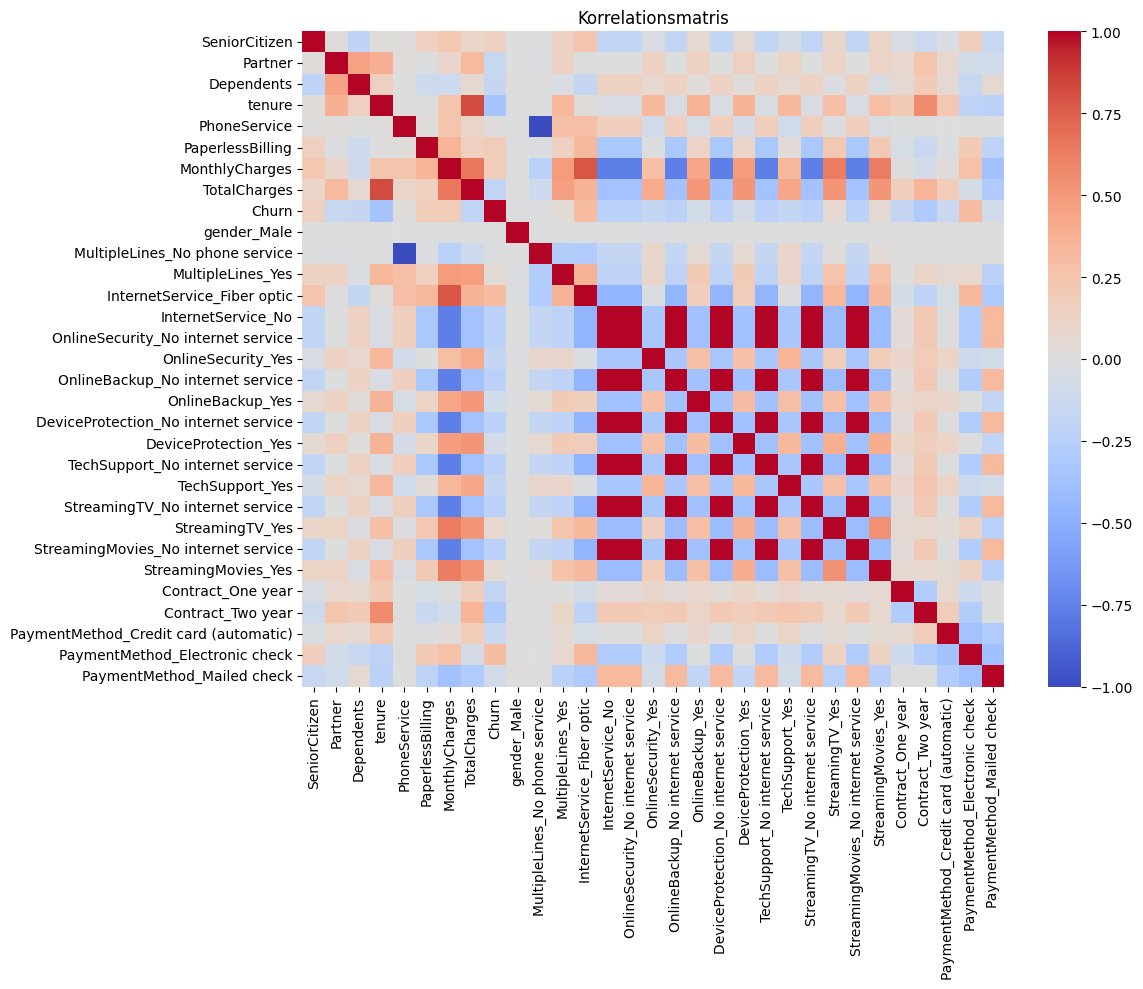

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Korrelationsmatris")
plt.tight_layout()
plt.show()

Churn har negativ korrelation med:

Contract_Two year och Contract_One year ‚Üí allts√•, l√§ngre kontrakt minskar churn.

Churn har positiv korrelation med:

MonthlyCharges ‚Üí kunder med h√∂gre m√•nadskostnader tenderar att l√§mna oftare.

InternetService_Fiber optic ‚Üí Fiber optic-kunder l√§mnar oftare √§n DSL eller ingen internet.

TotalCharges korrelerar starkt med tenure (logiskt: ju l√§ngre du stannar, desto mer betalar du totalt).

Histogram

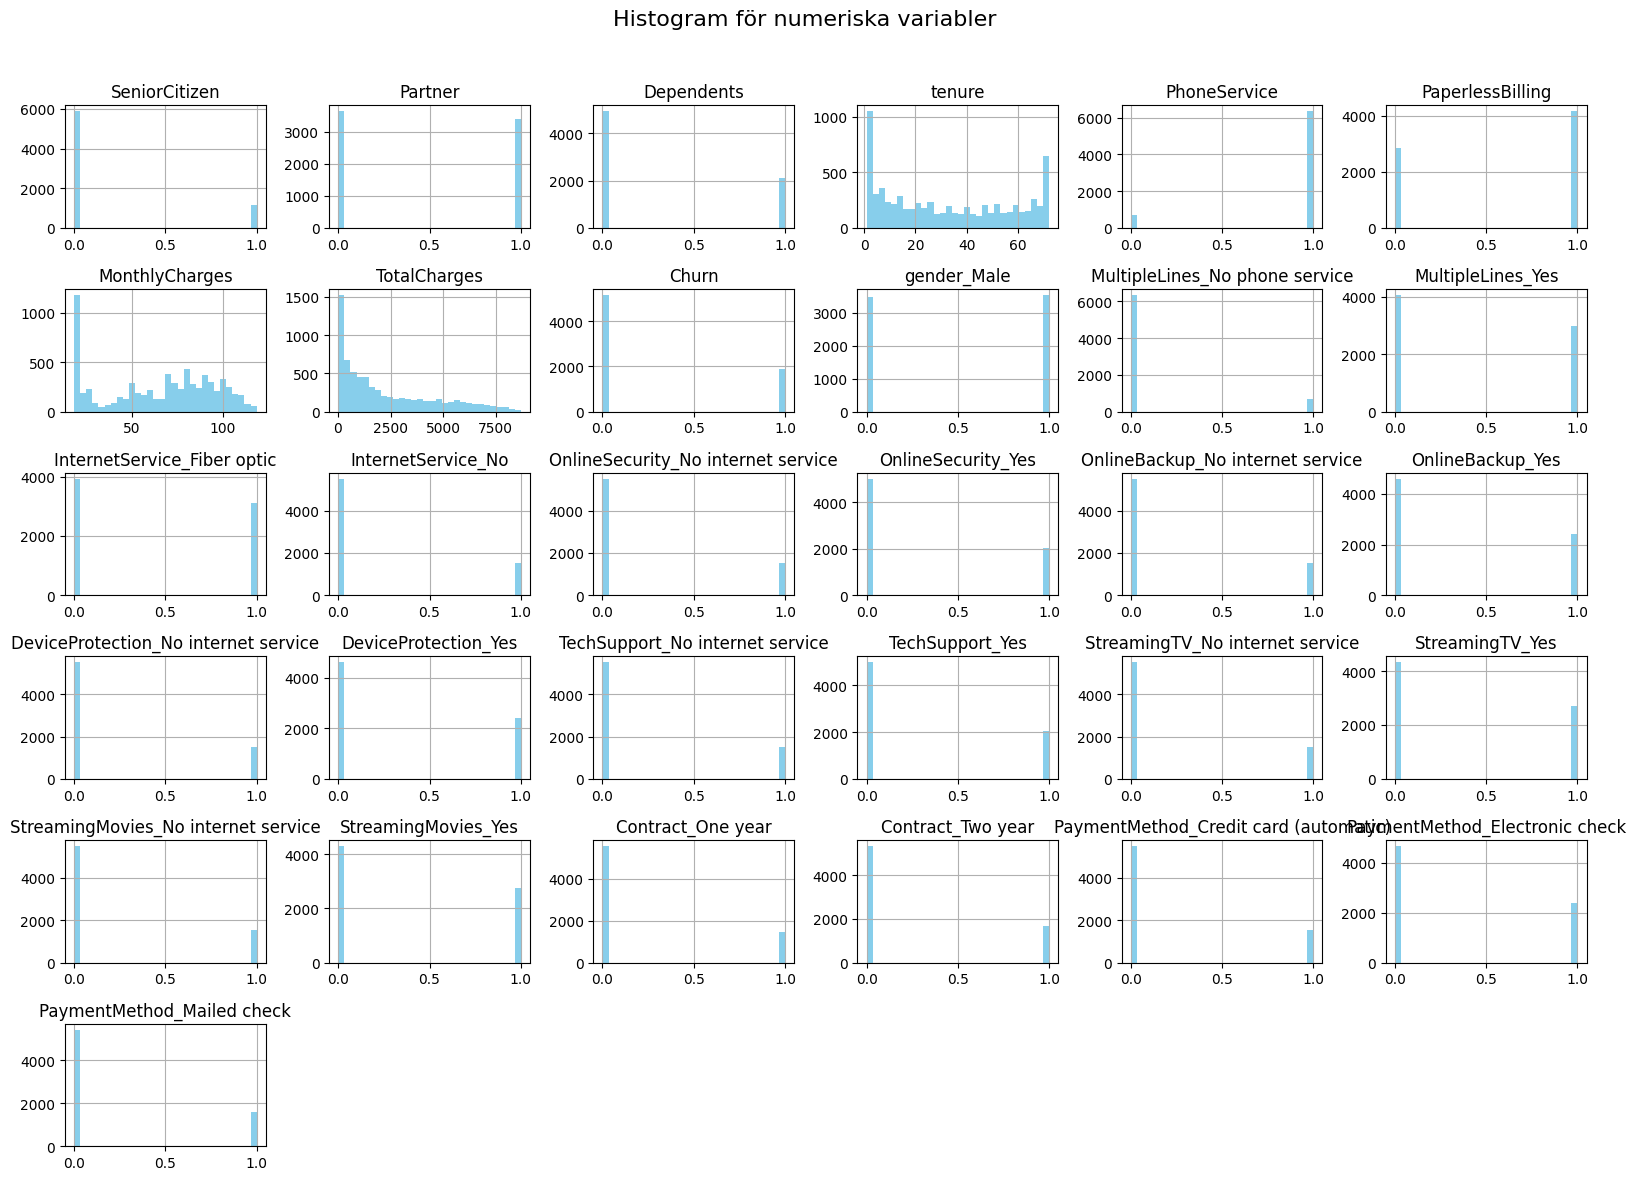

In [5]:
df.hist(bins=30, figsize=(16, 12), color='skyblue')
plt.suptitle("Histogram f√∂r numeriska variabler", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Viktiga insikter:
M√•nga variabler (t.ex. SeniorCitizen, Partner, OnlineSecurity_Yes) √§r bin√§ra.

MonthlyCharges har ganska j√§mn f√∂rdelning men fler kunder i l√§gre prisniv√•er (20‚Äì50).

TotalCharges √§r h√∂ger-skev ‚Äì de flesta kunder har l√•ga totalkostnader (nyare kunder).

tenure (hur l√§nge kund varit kvar) visar att m√•nga kunder l√§mnar tidigt (0‚Äì10 m√•nader).

Boxplots (Churn vs avgifter)
J√§mf√∂relse av TotalCharges och MonthlyCharges mellan kunder som l√§mnar (Churn = 1) och de som stannar (Churn = 0).

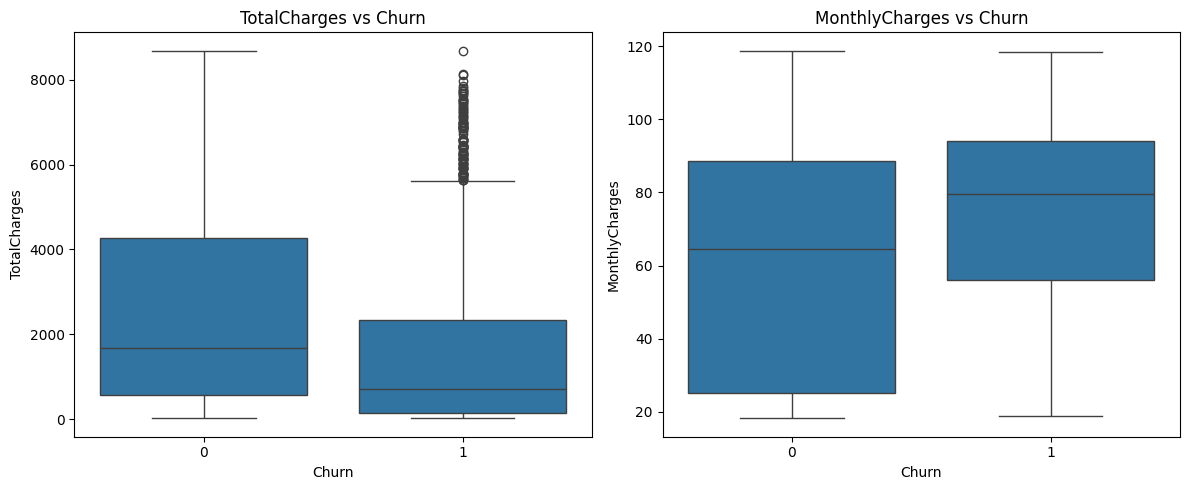

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')

plt.tight_layout()
plt.show()

TotalCharges:

De som stannar (Churn=0) har betydligt h√∂gre totalavgifter ‚Üí de har varit kund l√§ngre.

De som l√§mnar har l√§gre totalavgifter ‚Üí troligen nya kunder som hoppar av tidigt.

MonthlyCharges:

De som l√§mnar har i snitt h√∂gre m√•nadskostnader.

H√∂g kostnad kan vara en orsak till att de l√§mnar.

Sammanfattning till EDA:
Kunder med h√∂gre m√•nadskostnad l√§mnar oftare, speciellt de som har Fiber optic och saknar s√§kerhetstj√§nster.
Kunder som stannar l√§nge har ofta l√§ngre kontrakt och betalar mer totalt.
Viktigt f√∂r f√∂retaget att identifiera h√∂grisk-kunder tidigt ‚Äì erbjud rabatter, l√§ngre kontrakt eller kundsupport!